In [15]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
import pandas as pd


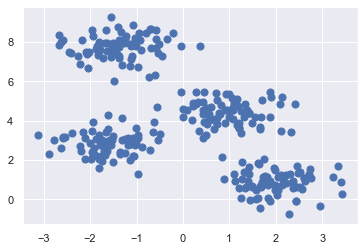

In [3]:
# creating a two dimensional dataset
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, 
                       cluster_std=0.60, random_state= 0)
plt.scatter(X[:,0],X[:,1], s= 50)

4 clusters easily identifiable

In [4]:
from sklearn.cluster import  KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

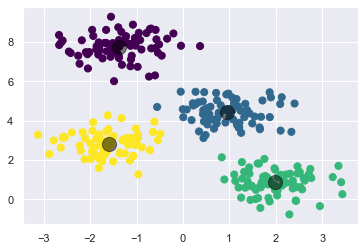

In [6]:
# plotting results with colored labels

plt.scatter(X[:,0],X[:,1], c= y_kmeans, s=50, cmap= 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s= 200, alpha=0.5)

# k-Means Algorithm: Expectation–Maximization
Expectation–maximization (E–M) is a robust algorithm that comes up in a variety of contexts within data science. k-means is a particularly easy-to-understand and straightforward application of the algorithm, and we will walk through it briefly here. In short, the expectation-maximization approach here consists of the following procedure:

### Guess some cluster centers,
### Repeat until converged,
### E-Step: assign points to the nearest cluster center,
### M-Step: set the cluster centers to the mean

Here the “E-step” or “Expectation step” is so-named because it involves updating our expectation of which cluster each point belongs to. The “M-step” or “Maximization step” is so-named because it consists in maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.


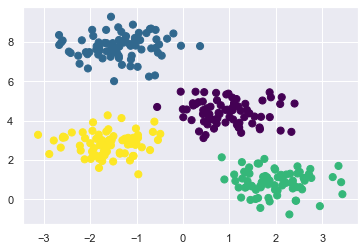

In [8]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1.Randomly choose clusters
    ran = np.random.RandomState(rseed)
    i = ran.permutation(X.shape[0])[:n_clusters]
    centers =X[i]
    
    while True:
        #2a. Assign labels based on closet center
        labels = pairwise_distances_argmin(X, centers)
        
        #2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        #2c. Check for converges
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels    

centers, labels = find_clusters(X,4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

Loading the digits data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

we got 10 clusters in 64 dimensions

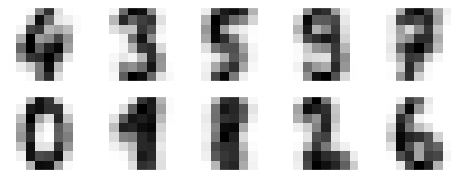

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Kmeans finds the clusters even without the labels

In [13]:
# Accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

This signifies that almost 80% of the input digits are identified correctly

Text(89.18, 0.5, 'predicted label')

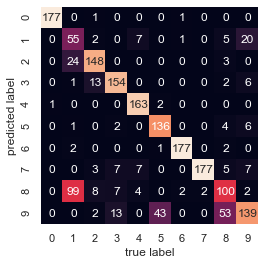

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')